

# Normalization with different dataset Assighnment 

### Diamonds Dataset select to implement the Normalization techniques

In [2]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

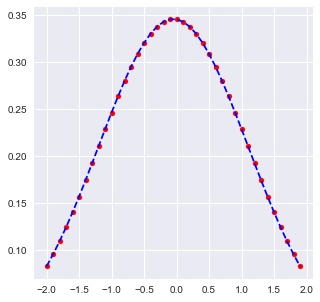

In [3]:
#Normal Distribution
#check the bell curve
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) **2 /  (2 * std ** 2))
    return y_out


# to generate an array of x
x = np.arange(-2 ,2 , 0.1)
y = pdf(x)

#plotting the normal curve/bell curve or gaussian distribution

plt.style.use('seaborn')

plt.figure(figsize=(5,5))

plt.plot(x ,y ,color = 'blue',linestyle = "dashed")

plt.scatter(x,y , marker='o', s=25, color = 'red')

# Normal Distribution and its Test
# histogram
### Normal distribution wnd its test
1.  import dataset
2.  subsetting a dataset
3.  visual test for normal distribution
4.  statistical model

In [4]:
dim = sns.load_dataset('diamonds')

In [5]:
dim.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [6]:
dim1 = dim[['x','y','cut']]

In [7]:
dim1.head(2)

,x,y,cut
0,3.95,3.98,Ideal
1,3.89,3.84,Premium


<AxesSubplot:xlabel='x', ylabel='Count'>

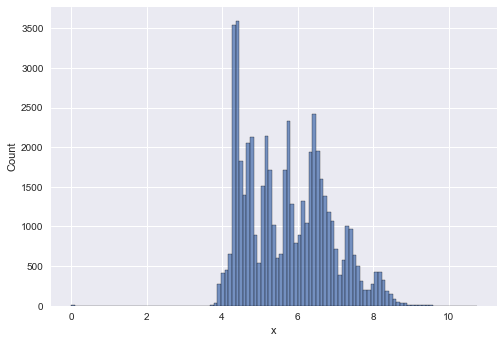

In [8]:
sns.histplot(dim1["x"])

<AxesSubplot:xlabel='y', ylabel='Count'>

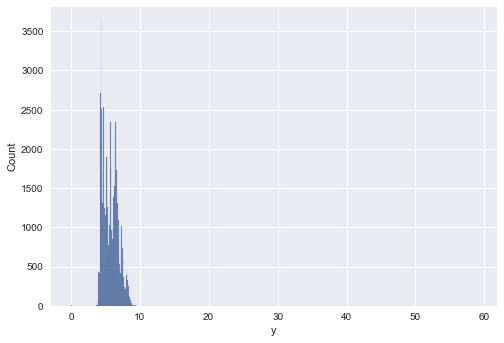

In [9]:
sns.histplot(dim1["y"])

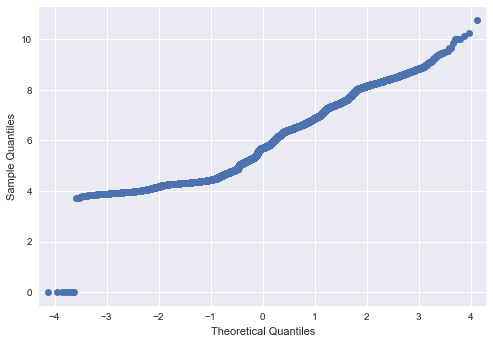

In [10]:
#qq plot
from statsmodels.graphics.gofplots import qqplot

# qq norm plot
qqplot(dim1["x"])
plt.show()

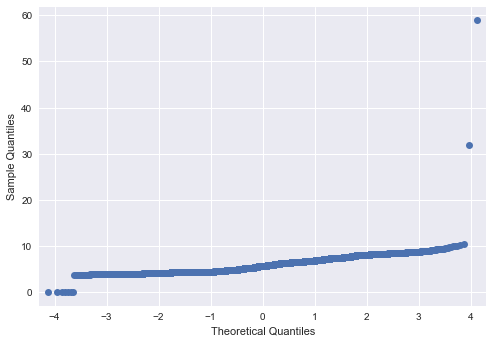

In [11]:
qqplot(dim1["y"])
plt.show()

In [15]:
dim.head(2)
dim2 = dim[['depth','table']]

In [16]:
dim2.head(2)

,depth,table
0,61.5,55.0
1,59.8,61.0


# Pick the Random data upto 100 rows

In [29]:
# dim2.shape
dim_ran_x = dim['x'].sample(n=100)
dim_ran_depth = dim['depth'].sample(n =100)


In [30]:
dim_ran_depth.head(2)

15702    63.9
48439    61.3
Name: depth, dtype: float64

In [31]:
shapiro(dim_ran_depth)

ShapiroResult(statistic=0.9368978142738342, pvalue=0.00012532815162558109)

## Shapiro-Wilk Test on the random data set

In [33]:
### shapiro Test
# Shapiro-Wilk Test

# import library
from scipy.stats import shapiro

# 
# shapiro(dim2['depth'])

stat,p = shapiro(dim_ran_depth)

print('stats=%.5f,p=%.5f'% (stat,p))

# make a conditional Argument for further use

if p > 0.05:
    print('probabily gaussian or normal Distribution')
else:
    print('probabily not gaussian or normal Distribution')


stats=0.93690,p=0.00013
probabily not gaussian or normal Distribution


In [41]:
# import library
from scipy.stats import shapiro

# 
# shapiro(kashti['age'])

stat,p = shapiro(dim_ran_x)

print('stats=%.5f,p=%.5f'% (stat,p))

# make a conditional Argument for further use

if p > 0.05:
    print('probabily gaussian or normal Distribution')
else:
    print('probabily not gaussian or normal Distribution')


stats=0.95075,p=0.00093
probabily not gaussian or normal Distribution


## D’Agostino’s K^2 Test

In [40]:
from scipy.stats import normaltest

# 
normaltest(dim_ran_depth)

stat,p = normaltest(dim_ran_depth)

print('stats=%.5f,p=%.5f'% (stat,p))

# make a conditional Argument for further use

if p > 0.05:
    print('probabily gaussian or normal Distribution')
else:
    print('probabily not gaussian or normal Distribution')

stats=15.82274,p=0.00037
probabily not gaussian or normal Distribution


## Anderson-Darling Test

In [42]:
# Anderson-Darling Test
from scipy.stats import anderson

# select a column to check the normal distribution

result = anderson(dim_ran_depth)
print('Statistic: %.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probability Gaussian/Normal Distribution at the %.1f%% Level' % (sl))
	else:
		print('Probability Gaussian/Normal Distribution at the %.1f%% Level' % (sl))


Statistic: 1.475
Probability Gaussian/Normal Distribution at the 15.0% Level
Probability Gaussian/Normal Distribution at the 10.0% Level
Probability Gaussian/Normal Distribution at the 5.0% Level
Probability Gaussian/Normal Distribution at the 2.5% Level
Probability Gaussian/Normal Distribution at the 1.0% Level
